## FinanceDataReader 란?

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

In [1]:
#Question 1
import sys
print(sys.version)

3.9.6 (default, May  7 2023, 23:32:44) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]


In [2]:
# pip install finance-datareader

In [10]:
# KRX : KRX 종목 전체
# KOSPI : KOSPI 종목
# KOSDAQ : KOSDAQ 종목
# KONEX : KONEX 종목
# NASDAQ : 나스닥 종목
# NYSE : 뉴욕증권거래소 종목
# SP500 : S&P500 종목
df_krx = fdr.StockListing("KRX")

In [4]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

/Users/seoyoungsuk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
df=fdr.DataReader('BTC/USD','2019-01-01','2019-12-31')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


2018년도 eth의 요약 정보입니다.
(단위: %)
평균: 0.050823580189068934
최댓값: 1.7125976443599145
최소값: -1.2486239286167655
표준편차:0.5264611632680202


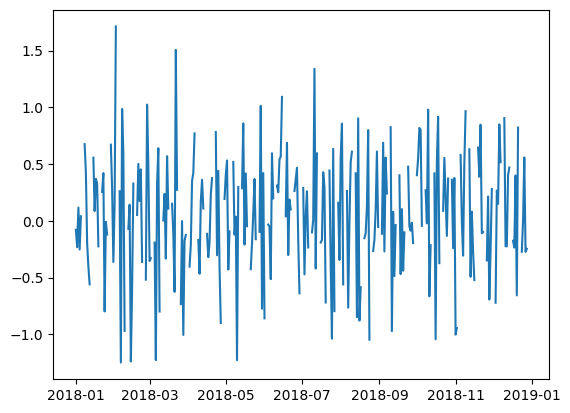

In [6]:
#Question 2 확인
df=fdr.DataReader('BTC/USD','2016-01-01','2016-12-31')
df.head()
def K_premium():
    coin_name = input('암호화폐 기호를 입력해주세요: ') # 기호는 BTC 등
    year = input('관심 연도를 입력해주세요: ')
    # df1,2,3 순서대로 국내거래소 정보, 해외거래소 정보, 환율 정보
    df1 = fdr.DataReader(coin_name + '/' + 'KRW', year + '-01-01',year + '-12-31')
    df2 = fdr.DataReader(coin_name + '/' + 'USD', year + '-01-01',year + '-12-31')
    df3 = fdr.DataReader('KRW/USD', year + '-01-01', year + '-12-31')
  
    # 일별 종가 값만 고려
    sell = df1['Close'] #매도
    buy = df2['Close']  #매수
    exchange_rate = df3['Close']
    
    K_premium = (sell/(buy/exchange_rate)-1)*100
    
    print('==============================================')
    print(f'{year}년도 {coin_name}의 요약 정보입니다.') # format 함수 이용
    print('(단위: %)')
    print('==============================================')
    print(f'평균: {K_premium.mean()}') # mean, format 함수 이용
    print(f'최댓값: {K_premium.max()}') # max, format 함수 이용
    print(f'최소값: {K_premium.min()}') # min, format 함수 이용
    print(f'표준편차:{K_premium.std()}') # std, format 함수 이용
    print('==============================================')

    plt.plot(K_premium)
    plt.show()
K_premium()

In [7]:
#Question 3
def maxProfit(prices):     # maxProfit 함수의 input으로는 prices 변수가 들어갑니다.
	max_profit = 0           # max_profit 변수의 값을 초기화합니다.
	min_price=min(prices)
	min_idx=prices.index(min_price)
	max_price=max(prices[min_idx:])
	if max_price>min_price:
    		return max_price-min_price
	else:
		return 0  

p = [7000, 1000, 5000, 3000, 6000, 4000]
print(maxProfit(p))
prices = [7000, 6000, 4000, 3000, 1000]
print(maxProfit(prices))
#1번째 날 1000원에 주식을 매수하고 4번째 날 6000원으로 주식을 매도하면 
# 이익은 6000원 - 1000원 = 5000원이 됩니다. 여기서 주의할 점은 주식을 매도하기 전에는 
# 반드시 주식을 매수해야 하기 때문에,1번째 날 주식을 매수하고 0번째 날 주식을 매도할 수 없습니다.

5000
0


In [8]:
#Question 4-1
T = 10 #10기간을 의미합니다
r = 0.12 #이자율을 의미합니다
P = [0,100,200,300,400,300,200,100,50,50,100] #시기별 현금 흐름을 의미합니다
pv=0
for i in range(T):
    pv= pv+(P[i]/(1+r)**i)
print(pv)

1071.4796606346547


In [9]:
#Question 4-2 (1)
import numpy as np

#성장률
g_mu = 0.01
g_sigma = 0.003
g = np.random.normal(g_mu, g_sigma, 100)

#이자율
r_mu = 0.1
r_sigma = 0.0005
r = np.random.normal(r_mu, r_sigma, 100)
#배당
D0 = np.random.randint(low = 80, high = 2000)

#미래 배당액을 저장할 array만들기
D = np.zeros(100)

#각 미래 배당액에 대응하는 이자율을 저장할 array 만들기
R = np.zeros(100)
#초기값 설정
D[0] = D0*(1+g[0])
#D[0]에 저장되는 값은 T=1시점의 배당액입니다.

R[0] = 1+r[0]
#할인할 때는 (1+이자율)을 사용하기 때문에, T=1시점의 배당을 할인해주기 위한 T=0~1시점의 R[0]을 형성합니다.

#T = 1 시점의 미래 배당액의 현재 가치는 다음과 같이 표시될 수 있습니다.
PV = D[0]/R[0]

for i in range(1,100):
    D[i] = D[i-1]*(1+g[i])    
    R[i] = R[i-1]*(1+r[i])
    PV = PV + D[i]/R[i]
print(PV)

5735.111334152361


In [18]:
#Question 4-2 (2)
import numpy as np

mu = 0.01
sigma = 0.003
g = np.random.normal(mu,sigma,100)

#배당
D0 = np.random.randint(low = 80, high = 2000)
#현재 시점의 배당은 80~2000 사이에서 random하게 정해질 것입니다.

#이자율
mu = 0.1
sigma = 0.0005
r = np.random.normal(mu, sigma, 100)

D = 0
r_temp = 1
g_temp = 1
for t in range(100):
  r_temp = r_temp*(1+r[t])
  g_temp = g_temp*(1+g[t])
  D += D0*g_temp/r_temp

D

1506.324831839041

In [12]:
#Question 4-2 (3)
import numpy as np
D0 = np.random.randint(low = 80, high = 2000)
#현재 시점의 배당은 80~2000 사이에서 random하게 정해질 것입니다.
mu = 0.01
sigma = 0.003
g = np.random.normal(mu, sigma, 100)
#이자율
mu2 = 0.1
sigma2 = 0.0005
r = np.random.normal(mu2, sigma2, 100)

g # 성장률
r # 이자율
D0 #현재 시점의 배당
cv=0

for i in range(100):
    cv = cv + D0/(1+r-g)**i
print(sum(cv)-D0)

746921.7844631271
